# PenguinVisualization
Simple data visualizations on the penguin dataset

In [ ]:
import sklearn
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import seaborn as sns
from ellipse import confidence_ellipse, scatter_with_ellipse

sns.set(style='ticks')

In [ ]:
data = pd.read_csv("./data/penguins_size.csv", delimiter=",")

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
data = data.dropna()
data = data[data["sex"] != "."] # There is 1 penguin that is not classified, drop it
# lists for coloring categorically
_species = list(set(data.species))
_island = list(set(data.island))
_sex = list(set(data.sex))

In [ ]:
adelie_df = data[data["species"] == "Adelie"][["culmen_length_mm","culmen_depth_mm"]]
gentoo_df = data[data["species"] == "Gentoo"][["culmen_length_mm","culmen_depth_mm"]]
cstrap_df = data[data["species"] == "Chinstrap"][["culmen_length_mm","culmen_depth_mm"]]
male_df = data[data["sex"] == "MALE"][["culmen_length_mm","culmen_depth_mm"]]
female_df = data[data["sex"] == "FEMALE"][["culmen_length_mm","culmen_depth_mm"]]

### Starting Off
There are three species of penguin.  Could a "well educated" person guess the species of a penguin based of the penguin's culmen length and depth?  What about the penguin's sex?

In this example, I'll define a "well educated" person as a person who has/knows the confidence interval(forming an ellipse) for penguin culmen length and depth.  That is to say, if a person knows the average culmen length and depth along with a one to three sigma confidence interval, for a given penguin classification, could that person be expected to classify an arbitrary penguin correctly?

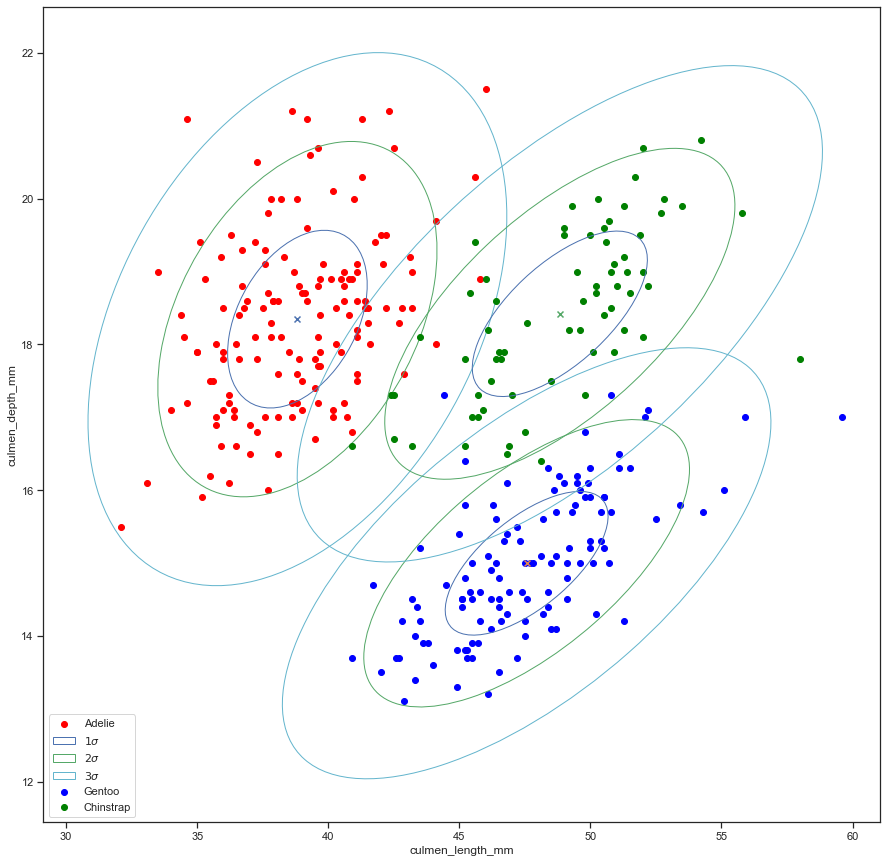

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
scatter_with_ellipse(adelie_df.culmen_length_mm, adelie_df.culmen_depth_mm, ax, 
                     p_label="Adelie", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="red",n_std=[1,2,3], c_std=['b','g','c'], set_label=True)
scatter_with_ellipse(gentoo_df.culmen_length_mm, gentoo_df.culmen_depth_mm, ax, 
                     p_label="Gentoo", color="blue", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
scatter_with_ellipse(cstrap_df.culmen_length_mm, cstrap_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap", color="green", n_std=[1,2,3], c_std=['b','g','c'],
                     set_label=False)
ax.legend()
plt.show()

### Informal Inferences on the Species Plots
Across the three species of penguin, the confidence intervals are relatively distinct.  No $1\sigma$ interval overlap and there is only very minimal overlap of the $2\sigma$ ellipses.

At a confidence level of $2\sigma$ it would be reasonable to argue that all three species are significantly different in culmen length and culmen depth.  

At $3\sigma$ there is a a fair amount of overlap between Chinstrap and the other two species.  Gentoo and Adelie have no overlap over any of their confidence ellipse and can be called significantly different in culmen length and depth.

Following these inferences, it seems 

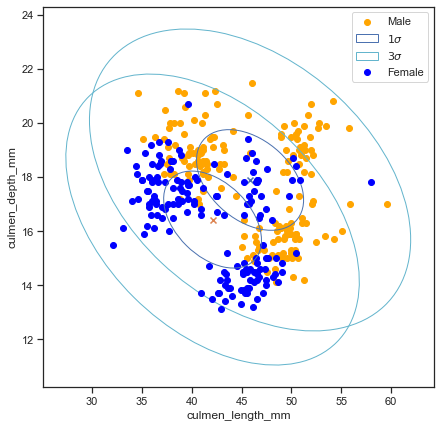

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
scatter_with_ellipse(male_df.culmen_length_mm, male_df.culmen_depth_mm, ax, 
                     p_label="Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['b','c'], set_label=True)
scatter_with_ellipse(female_df.culmen_length_mm, female_df.culmen_depth_mm, ax, 
                     p_label="Female", color="blue", n_std=[1,3], c_std=['b','c'],
                     set_label=False)
ax.legend()
plt.show()

### Informal Inferences on the Sex Plots
Even on the smallest confidence ellipse, there is overlap between the confidence interval between Male and Female.  This shows that purely based off of culmen length and depth that the penguin sex is not very distinguishable.

Most notably, the $1\sigma$ elipse and mean culmen length and depth for male penguins almost seems to be centered on a cluster of female penguins.  This is of course purely coincidental.

With the species plot in mind, it is clear that species is a confounding factor in distinguishing penguin sex.  So how visually distinguishable are penguins when accounting for sex and species?

In [ ]:
adelie_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Adelie")][["culmen_length_mm","culmen_depth_mm"]]
adelie_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Adelie")][["culmen_length_mm","culmen_depth_mm"]]

gentoo_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Gentoo")][["culmen_length_mm","culmen_depth_mm"]]
gentoo_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Gentoo")][["culmen_length_mm","culmen_depth_mm"]]

cstrap_m_df = data[(data["sex"] == "MALE") & (data["species"] == "Chinstrap")][["culmen_length_mm","culmen_depth_mm"]]
cstrap_f_df = data[(data["sex"] == "FEMALE") & (data["species"] == "Chinstrap")][["culmen_length_mm","culmen_depth_mm"]]

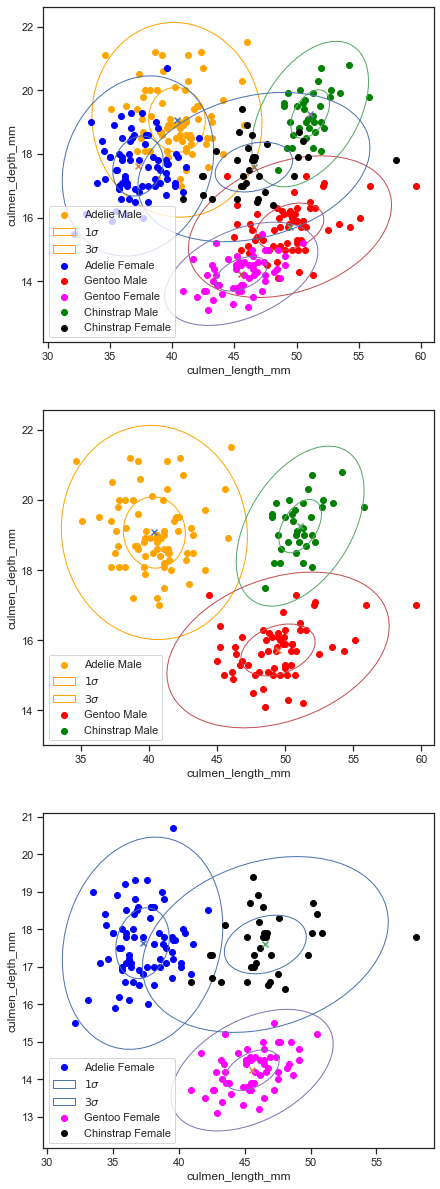

In [ ]:
fig, axs = plt.subplots(3,1,figsize=(7,21))
ax = axs[0]
scatter_with_ellipse(adelie_m_df.culmen_length_mm, adelie_m_df.culmen_depth_mm, ax, 
                     p_label="Adelie Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['orange','orange'], set_label=True)
scatter_with_ellipse(adelie_f_df.culmen_length_mm, adelie_f_df.culmen_depth_mm, ax, 
                     p_label="Adelie Female", color="blue", n_std=[1,3], c_std=['b','b'],
                     set_label=False)
scatter_with_ellipse(gentoo_m_df.culmen_length_mm, gentoo_m_df.culmen_depth_mm, ax, 
                     p_label="Gentoo Male", color="red", n_std=[1,3], c_std=['r','r'],
                     set_label=False)
scatter_with_ellipse(gentoo_f_df.culmen_length_mm, gentoo_f_df.culmen_depth_mm, ax, 
                     p_label="Gentoo Female", color="magenta", n_std=[1,3], c_std=['m','m'],
                     set_label=False)
scatter_with_ellipse(cstrap_m_df.culmen_length_mm, cstrap_m_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap Male", color="green", n_std=[1,3], c_std=['g','g'],
                     set_label=False)
scatter_with_ellipse(cstrap_f_df.culmen_length_mm, cstrap_f_df.culmen_depth_mm, ax, 
                     p_label="Chinstrap Female", color="black", n_std=[1,3], c_std=['b','b'],
                     set_label=False)
ax.legend()

ax1 = axs[1]
scatter_with_ellipse(adelie_m_df.culmen_length_mm, adelie_m_df.culmen_depth_mm, ax1, 
                     p_label="Adelie Male", x_ax="culmen_length_mm", y_ax="culmen_depth_mm", 
                     color="orange",n_std=[1,3], c_std=['orange','orange'], set_label=True)

scatter_with_ellipse(gentoo_m_df.culmen_length_mm, gentoo_m_df.culmen_depth_mm, ax1, 
                     p_label="Gentoo Male", color="red", n_std=[1,3], c_std=['r','r'],
                     set_label=False)

scatter_with_ellipse(cstrap_m_df.culmen_length_mm, cstrap_m_df.culmen_depth_mm, ax1, 
                     p_label="Chinstrap Male", color="green", n_std=[1,3], c_std=['g','g'],
                     set_label=False)
ax1.legend()

ax2 = axs[2]
scatter_with_ellipse(adelie_f_df.culmen_length_mm, adelie_f_df.culmen_depth_mm, ax2, 
                     p_label="Adelie Female", x_ax="culmen_length_mm", y_ax="culmen_depth_mm",
                     color="blue", n_std=[1,3], c_std=['b','b'], set_label=True)
scatter_with_ellipse(gentoo_f_df.culmen_length_mm, gentoo_f_df.culmen_depth_mm, ax2, 
                     p_label="Gentoo Female", color="magenta", n_std=[1,3], c_std=['m','m'],
                     set_label=False)
scatter_with_ellipse(cstrap_f_df.culmen_length_mm, cstrap_f_df.culmen_depth_mm, ax2, 
                     p_label="Chinstrap Female", color="black", n_std=[1,3], c_std=['b','b'],
                     set_label=False)

ax2.legend()
plt.show()

### Informal Inferences on Species and Sex Plots
With penguins grouped by species and sex, the plot gets quite busy and the visual clarity is quite poor.  A cursory glance at the plot shows significant overlap in the confidence interval between the male and female penguins of the same species.  There is also a considerable amount of overlap between the confidence ellipse between Chinstrap females and Adelie males.  Both of these results are to be expected considering the previous plots.

More interestingly and visually clearer are the plots when the penguins are separated by sex.  For male penguins there is only a small amount overlap between the $3\sigma$ ellipses compared to very significant overlap in the plot with both sexes.  Female Chinstrap and Adelie penguins suprisingly seem to show more overlap compared when both sexes where accounted for.

With just the three pieces of information, culmen length, culmen depth, and sex, an "educated" person can make a relatively accurate predictions on the penguin species.  It's not going to be perfect especially considering the amount of overlap between female Adelie and Chinstrap penguin.  If we think an "educated" person can predict quite well, let's examine how simple machine learning predictors can do

### Nearest Neighbor Predictor
A simple predictor is the K-Nearest Neighbor Predictor.  This predictor will sample the nearest known data points and classifying the point by the majority (or plurality) class.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
y = np.ravel(data[["species"]].to_numpy())
X = data[["culmen_length_mm","culmen_depth_mm"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
acc = neigh.score(X_test, y_test)
print("Classifier accuracy is", acc)

Classifier accuracy is 0.9454545454545454


### Visualizing the Decision Boundary and Errors From the Predictions

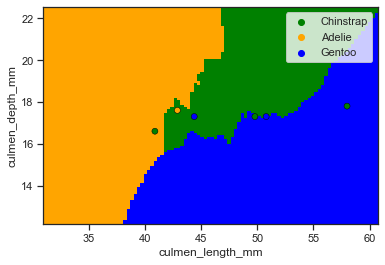

In [ ]:
cmap_light = ListedColormap(["orange", "green", "blue"])
cmap_bold = ["green", "orange", "blue"] # There is some weirdness about the ordering of coloring

y_hat = neigh.predict(X_test)
result = np.concatenate((X_test,y_test.reshape(-1,1),y_hat.reshape(-1,1)), axis=1)
errors = result[result[:,2] != result[:,3]]
_, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(neigh,X_train,cmap=cmap_light,ax=ax, response_method="predict",
        plot_method="pcolormesh",xlabel="culmen_length_mm",ylabel="culmen_depth_mm", shading="auto",)

sns.scatterplot(x= errors[:,0],y=errors[:,1],hue=errors[:,2],palette=cmap_bold,alpha=1.0,
        edgecolor="black",)

plt.show()

Overall for with only culmen length and depth the 5 Nearest Neighbor predictor does quite well.  What happens if we add sex as a factor?

Sex in this case can be viewed as a binary (or categorical factor with only two classes) which then can be treated as a continuous value like culmen length and depth.  This is a functional solution, but it potentially understates or overstates sex's effect in this three factor relationship.  At the highest level of thought, if two theoretical penguins only differ in sex how different should they be?  How much change culmen length or depth equivalent to a change in sex?  For the next model, I'm just going to use the simplest model of converting sex to a binary feature and then using that binary feature as a continuous value.

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
sex_ = lb.fit_transform(data.sex.squeeze())
X = np.concatenate((X, sex_), axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
acc = neigh.score(X_test, y_test)
print("Classifier accuracy is", acc)

Classifier accuracy is 0.9545454545454546


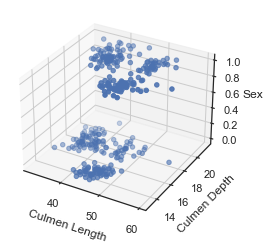

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2])

ax.set_xlabel('Culmen Length')
ax.set_ylabel('Culmen Depth')
ax.set_zlabel('Sex')

plt.show()

When accounting for sex as a continuous feature, the accuracy increases along the same test split.  When plotting the three features in 3D space, we can see an exaggerated view of how the data looks.  The Z axis is on a much shorter scale causing the distance between the two sexes too look great.  This is potentially how we want the KNN to treat the data, so that in essence only penguins of the same sex are used to predict the species.  In that case we would apply a weighting to the sex feature to exagerate its impact as a transformed continuous value.

### Where to go from here with KNN?
KNN works best when there is clear separation between the populations that we want to classify.  We can achieve better distinguishability by looking across more dimensions as we've seen by going from 2D space with culmen length and depth to a 3D space by adding sex.  However more dimensions does not improve the distinguishability.  At higher dimensions the distances between points tends to homogenize which will worsen the result.  For example if the data had feature like "stomach fullness" that was a random value for each penguin, adding this to our KNN predictor would not improve the results.  A quick look at a pair wise plot may inform us which features have large separation between the populations we want to classify.  Beware of confounding values between pairs of features though. 

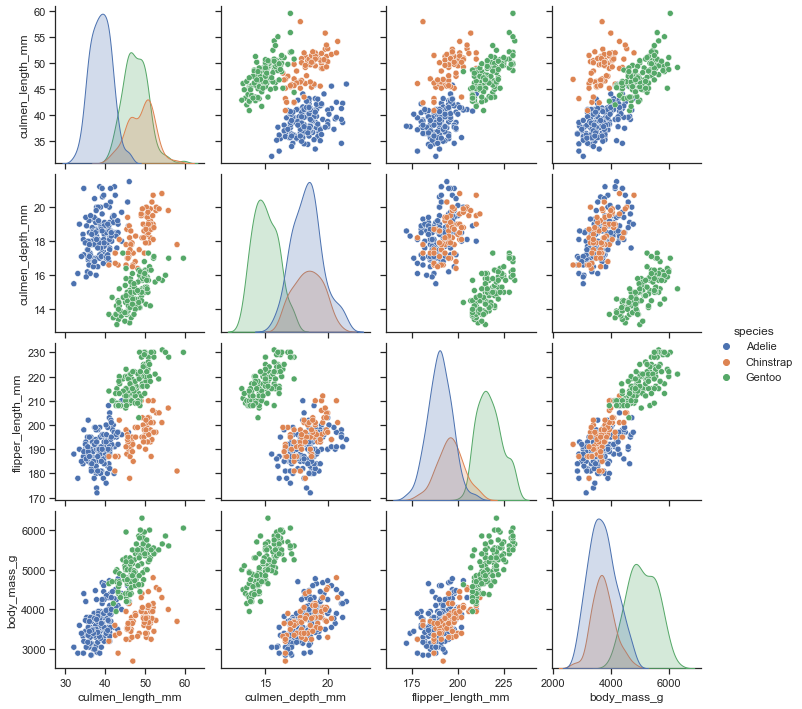

In [ ]:
sns.pairplot(data=data, hue="species")

### Linear Predictions
So far we've only predicted on categorical data, what about predicting a continuous value.  Let's take a look a the relation between culmen length, depth, sex, and species and a penguin's body mass.  Combining all of these features into one formula means that we will need to do multiple linear regression.  Before that, let's do a simple linear regression on the data.

In [ ]:
from sklearn.linear_model import LinearRegression
from linRegPlotter import lin_reg_plotter, resid_plotter

In [ ]:
X_clm = data.culmen_length_mm.to_numpy().reshape(-1,1)
X_cdm = data.culmen_depth_mm.to_numpy().reshape(-1,1)
y = np.ravel(data.body_mass_g.to_numpy()).reshape(-1,1)

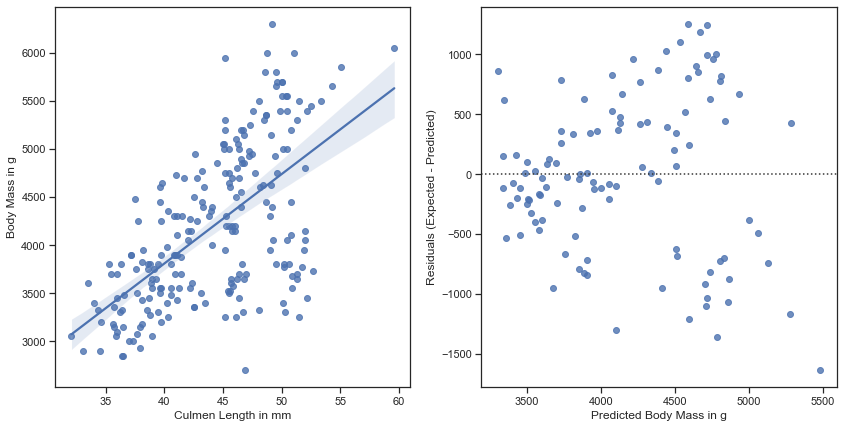

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clm, y, test_size=0.33, random_state=42)
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_hat = reg.predict(X_test)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
lin_reg_plotter(X_train, y_train, "Culmen Length in mm", "Body Mass in g", axs[0])
resid_plotter(y_hat, y_test, "Predicted Body Mass in g", "Residuals (Expected - Predicted)",axs[1])

plt.show()

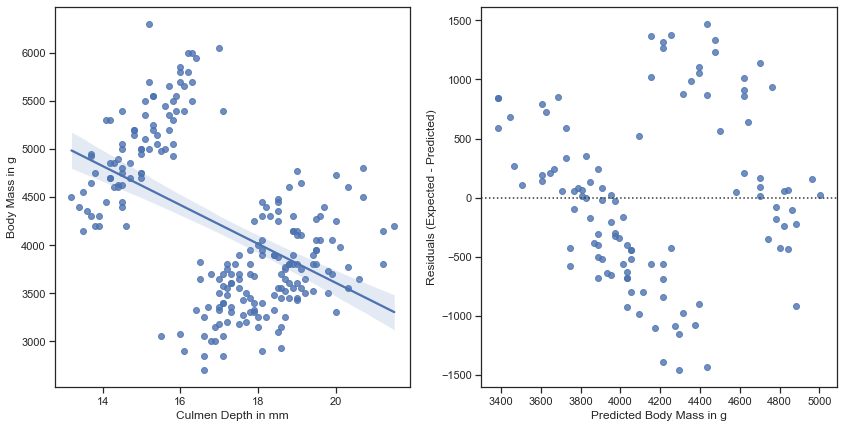

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cdm, y, test_size=0.33, random_state=42)
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_hat = reg.predict(X_test)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
lin_reg_plotter(X_train, y_train, "Culmen Depth in mm", "Body Mass in g", axs[0])
resid_plotter(y_hat, y_test, "Predicted Body Mass in g", "Residuals (Expected - Predicted)", axs[1])

plt.show()

### Quick Reflections on the Plots
There are two plots being shown.  The first plot is the predicted line along with a confidence interval for other feasible liness.  The first plot also plots the training data.  The second plot is a residual plot.  A residual plot shows the difference between the expected value and the predicted value.  Values that are more incorrect will have a larger residual.  When evaluating a residual plot two main factors should be taken into account.  The first is how evenly distributed are the points across the plot.  If there are many points slightly above the 0 line and few points below, then that's something to take note of.  Likewise if the points are concentrated to the left or right of the plot, then those points may have high leverage.  Leverage is an aspect of data cleaning and is slightly outside the scope of this notebook.

For culmen length, the linear regression plot shows the points reasonably clustered around the regressed line showing that there is decent correlation between culmen length and body mass.  Looking at the residual plot, the points are fairly evenly distributed across the plot.  Scrutinizing the plot, one could argue that there are slightly more extreme negative residuals, but generally it seems even.  More worrying is that there does appear to be a slight trend in the data.  Lower body mass predictions seem to be relatively accurate, medium body mass predictions appear to be under estimating (having positive residuals), and high body mass predictions appear to be over estimating.  Knowing that there are three penguin species at hand and their differences in culmen lengths, we can piece together why this trend might exist but we'll investigate this further later.

For culmen depth, the data is not well clustered around the regressed line.  Instead it almost seems as if there should be two distinct positive line going through this plot with how the data is.  The residual plots shows this stripe pattern even stronger.  

### A Statistical Backing
Visually inspecting plots for anomalies is as subjective as it is quick.  Different experiences and requirements can lead people to draw different conclusions from the same data.  Luckily, all of the data in the plots can be quantified allowing individuals to make their own conclusions from the same concrete facts.

In [ ]:
import statsmodels.api as sm

Pearson correlation (r) is one way to measure the association between two variables.  The range is fix between [-1,1] and the closer to those values, the stronger the relation.  Note that the a correlation value is not a measure of slope, just how closely related two variables are.  A correlation of -1 or 1 would mean all of the points are on a straight line, and a correlation of 0 means there is no relation between the two variables.  Below the correlation coefficient will be more detailed information about the linear regression model.  Another statistic to note is R-squared.  At the most surface level R-sqaure is as it sounds, Pearson correlation squared.  This has the effect of normalizing positive and negative correlations, but the main goal is to measure "goodness-of-fit" or how well the variation in the data is explained by the relation between the two variables.   The math and reasoning behind how and why this works is beyond the scope of this notebook, but the value is something to keep an eye on.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_clm, y, test_size=0.33, random_state=42)
print("Pearson correlation coefficient between culmen length and body mass:",np.corrcoef(X_train, y_train, rowvar=False)[1,0])
X_train_ = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_train_)
res = mod.fit()
print(res.summary())


Pearson correlation coefficient between culmen length and body mass: 0.6080666024559965
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     129.7
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           6.15e-24
Time:                        21:14:54   Log-Likelihood:                -1758.9
No. Observations:                 223   AIC:                             3522.
Df Residuals:                     221   BIC:                             3529.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cdm, y, test_size=0.33, random_state=42)
print("Pearson correlation coefficient between culmen depth and body mass:",np.corrcoef(X_train, y_train, rowvar=False)[1,0])
X_train_ = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_train_)
res = mod.fit()
print(res.summary())

Pearson correlation coefficient between culmen depth and body mass: -0.4847104863756535
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     67.87
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           1.53e-14
Time:                        21:14:54   Log-Likelihood:                -1780.5
No. Observations:                 223   AIC:                             3565.
Df Residuals:                     221   BIC:                             3572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

From the observed correlation coefficients, the neither culmen length or depth are too strongly related with body mass.  Arguably culmen length is a fine predictor since it has a correlation closer to 1 rather than 0, but that is not a great heuristic to go off of.  More importantly, these models have poort R-squared values.  This is indicating that these variables either alone or in general do not well predict the variation that is seen in the data.  Transitioning from simple to multiple linear regression may aid in improving this statistic.

### Moving on from Simple Linear Regression
With multiple linear regression, multiple features factor into a single equation for the output.  In simple linear regression, there is one feature and one intercept and this line follows the classic line equation, y = aX + intercept.  Transitioning from simple linear regression to multiple linear regression more variables with coefficients are added to the equation.  For example multiple linear regression with two variables would have the form z = aX + bY + intercept.  Adding more features to the model has a two fold benefit.  

With more than a single variable, categorical features can be better accounted for and better used.  Simple linear regression only works with continuous and binary data.  So unless the categorical feature can be converted to binary in a suitable way, categorical features should not be used with simple linear regression.  Even if the feature can be binarized, the result of using a binary feature for simple linear regression is an equation that looks like y = a + intercept if X == 1 and y = interecept if X == 0.  a + intercept will be the mean y value of all training data with X == 1 and intercept by itself will be the mean y value of all training data with X == 0.  A model like this might be suitable in some situations, but in the real world few things can accurately predicted like this.  What if instead the model z = aX + bY + intercept where X was still a binary feature, but Y was a continuous one?  The in the case where X == 1 the model would be z = a + bY + intercept and when X == 0 the model is z = bY + intercept.  All of sudden for the different classes of X, a different intercept for the prediction is used.  The same "scaling" or expected change in z for unit change in Y is the same between the groups of X, but the predicted value of z is different.

Multiple linear regression also allows categorical data to be more accurately represented.  Instead of strictly required a feature to be binary, all of the classes in a feature can be broken apart and made into their own binary feature.  For example if a feature that looked like X:["T", "T", "U", "V"], could instead be represented as T:[1, 1, 0, 0], U:[0, 0, 1, 0], V:[0, 0, 0, 1].  If the number of classes is known and closed, then only number of classes minus one number of features are needed to represent the feature in its entirity since the "final" class can be inferred by being none of the other features (having a value of 0 in all of the other related features).


Having more features in the model also allows the prediction to be "non-linear" with respects to a single feature.  In the dimension of the model, the prediction line is still a straight line, but when projecting the prediction down to two dimensions, the prediction line will not necessarily be straight with respects to the chosen axis.  Increasing the number of features in a linear regression model can also be referred to as making it a higher order.  For example, a model with 4 prediction features can be called a 4th order linear regression.

### Adding Species to the Model

In [ ]:
dummy_X = pd.get_dummies(data=data)
X_clm_s = dummy_X[["culmen_length_mm","species_Adelie","species_Chinstrap"]]
X_train, X_test, y_train, y_test = train_test_split(X_clm_s, y, test_size=0.33, random_state=42)
X_train_ = sm.add_constant(X_train)
mod = sm.OLS(y_train,X_train_)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     270.0
Date:                Thu, 07 Jul 2022   Prob (F-statistic):           2.76e-73
Time:                        21:14:54   Log-Likelihood:                -1637.8
No. Observations:                 223   AIC:                             3284.
Df Residuals:                     219   BIC:                             3297.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               567.6361    413.70

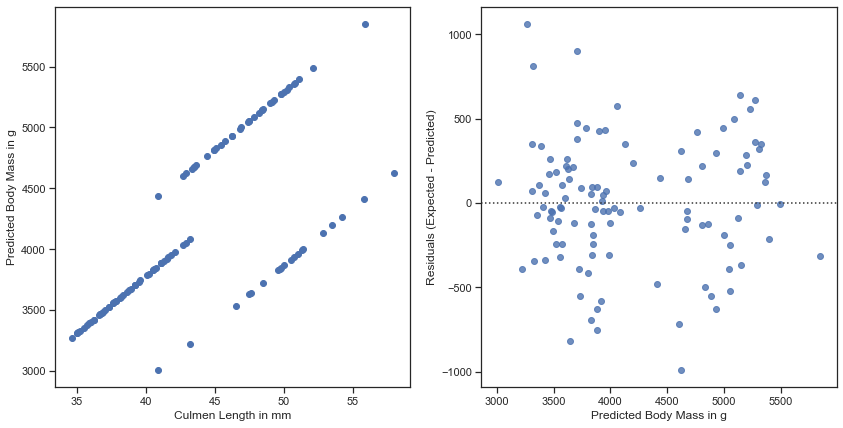

In [ ]:
reg = LinearRegression(fit_intercept=True).fit(X_train, y_train)
y_hat = reg.predict(X_test)
fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(14,7))
axs[0].scatter(X_test.culmen_length_mm,y_hat)
axs[0].set_xlabel("Culmen Length in mm")
axs[0].set_ylabel("Predicted Body Mass in g")
resid_plotter(y_hat, y_test, "Predicted Body Mass in g", "Residuals (Expected - Predicted)", axs[1])

plt.show()

### What's Learned?
A quick glance at the R squared value is dramatically better for this model than the previous simple models.  Without much thought, it's clear why that would be the case.  There is a significant amount of variation in the penguin body mass from the different species.  By taking that into account and adding it to the model improves the model.  Looking at the residual plot, there is not any immediately apparent trend.  Visually there are two clusters, but within the clusters the residuals appear to be fairly random.  Clusters like this are not ideal, but this does not strictly indicate a flaw in the model.  For example, if many penguins had just hatched and there was a strict linear relation between the measured feature and body mass, then we'd expect to see a cluster representing the baby penguins and a cluster representing the adult penguins.  In this case the clusters are likely a result of the species as we can see that there is a certain amount of overlap in body mass range for two of the species.